In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant("hello")

In [5]:
with tf.Session() as sess:
    result = sess.run(hello)

In [6]:
result

b'hello'

In [9]:
import numpy as np

In [11]:
import matplotlib.pyplot as mpl

In [16]:
pth = 'C:\\Users\\212607214\\Downloads\\Stockmarket_prediction'+'AAPL.csv'

In [13]:
pwd


'C:\\Users\\212607214\\Downloads\\Stockmarket_prediction'

In [38]:
pth = 'C:\\Users\\212607214\\Downloads\\Stockmarket_prediction\\'+'AAPL.csv'
A = np.loadtxt(pth, delimiter=",", skiprows=1, usecols=(3, 5))

In [39]:
from sklearn.preprocessing import scale
A = scale(A)

In [40]:
#y is the dependent variable
y = A[:, 1].reshape(-1, 1)

In [41]:
#A contains the independent variable
A = A[:, 0].reshape(-1, 1)

In [42]:
#Plot the high value of the stock price
mpl.plot(A[:, 0], y[:, 0])

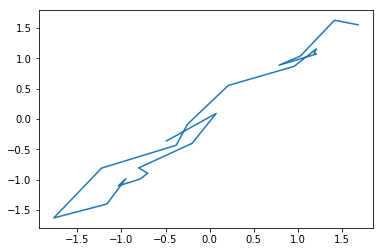

In [43]:
mpl.show()

In [34]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('AAPL.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,183.520004,184.350006,180.279999,183.089996,183.089996,38612300
1,2019-05-21,185.220001,188.000000,184.699997,186.600006,186.600006,28364800
2,2019-05-22,184.660004,185.710007,182.550003,182.779999,182.779999,29748600
3,2019-05-23,179.800003,180.539993,177.809998,179.660004,179.660004,36529700
4,2019-05-24,180.199997,182.139999,178.619995,178.970001,178.970001,23714700


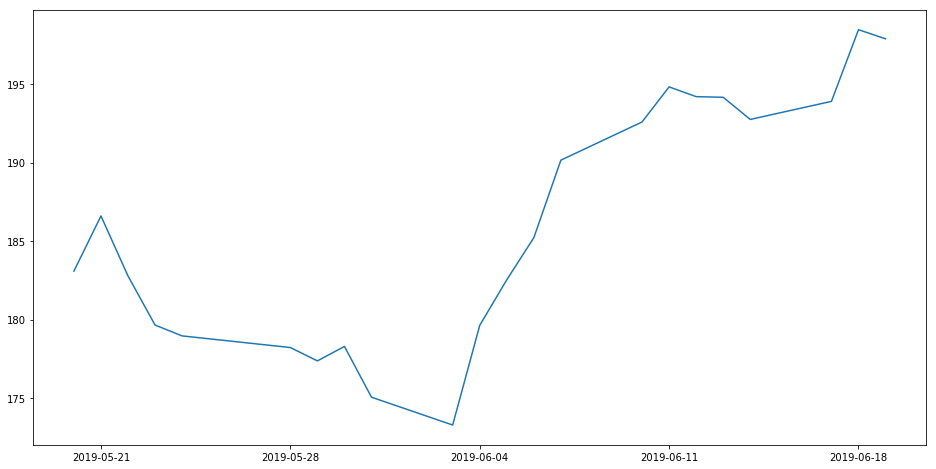

In [35]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [36]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [77]:
#splitting into train and validation
train = new_data[:7]
valid = new_data[7:]

In [78]:
new_data.shape, train.shape, valid.shape


((22, 2), (7, 2), (15, 2))

In [79]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()



(Timestamp('2019-05-20 00:00:00'),
 Timestamp('2019-05-29 00:00:00'),
 Timestamp('2019-05-30 00:00:00'),
 Timestamp('2019-06-19 00:00:00'))

In [121]:
#make predictions
preds = []
for i in range(0,15):
    a = train['Close'][len(train)-19+i:].sum() + sum(preds)
    b = a/13
    preds.append(b)

In [122]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

57.37357733658871

C:\Users\212607214\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\212607214\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


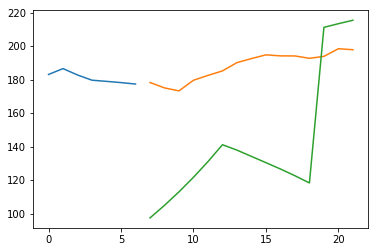

In [123]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])